# Exploratory Data Analysis (EDA)

### 1. Importing Packages & Necessary Data

In [2]:
# Importing packages
import pandas as pd
import numpy as np
!pip install pandas openpyxl
import openpyxl
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # No warning for outputs

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Reading raw data
df = pd.read_excel('DATASET DAY 1.xlsx', engine="openpyxl")
#Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  3 non-null      object 
 2   Unnamed: 2  0 non-null      float64
 3   TP          86 non-null     object 
 4   TemP (K)    86 non-null     int64  
 5   Time (min)  86 non-null     float64
 6   PS (mm)     85 non-null     float64
 7   BET (m2/g)  86 non-null     float64
 8   PV (cm3)    85 non-null     float64
 9   C (wt.%)    83 non-null     float64
 10  H  (wt.%)   82 non-null     float64
 11  N  (wt.%)   80 non-null     object 
 12  O  (wt.%)   83 non-null     float64
 13  Qm (mg/g)   86 non-null     object 
dtypes: float64(9), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
# clean dropped columns
df = df.drop(["Unnamed: 0", "Unnamed: 1", "Unnamed: 2"], axis=1) # Dropping them since they aren't part of the original dataset
df.head()

,TP,TemP (K),Time (min),PS (mm),BET (m2/g),PV (cm3),C (wt.%),H (wt.%),N (wt.%),O (wt.%),Qm (mg/g)
0,Citalopram,315,150.0,9.82,3.43,0.02,30.84,2.14,0.43,20.32,4.4
1,Citalopram,600,10.0,1.37,94.39,0.06,30.69,0.96,0.32,20.41,3.8
2,Citalopram,800,10.0,1.37,120.86,0.08,28.81,0.47,0.33,19.29,8.5
3,Citalopram,800,150.0,1.41,209.12,0.13,27.05,0.82,0.33,9.73,19.6
4,Citalopram,800,10.0,3.69,10.82,0.02,35.35,0.72,2.47,2.01,4.3


### 2. Dealing with Missing Data

In this section, we impute linearly interpolated values for missing values.

In [5]:
# Test if Data are numeric for features
print(df.info())
df['Qm (mg/g)'][26]=1.39
df['Qm (mg/g)'][42]=238.10
df['N  (wt.%)'][43] = 3.26
df['Qm (mg/g)']= pd.to_numeric(df['Qm (mg/g)'])
df['N  (wt.%)'] = pd.to_numeric(df['N  (wt.%)'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TP          86 non-null     object 
 1   TemP (K)    86 non-null     int64  
 2   Time (min)  86 non-null     float64
 3   PS (mm)     85 non-null     float64
 4   BET (m2/g)  86 non-null     float64
 5   PV (cm3)    85 non-null     float64
 6   C (wt.%)    83 non-null     float64
 7   H  (wt.%)   82 non-null     float64
 8   N  (wt.%)   80 non-null     object 
 9   O  (wt.%)   83 non-null     float64
 10  Qm (mg/g)   86 non-null     object 
dtypes: float64(7), int64(1), object(3)
memory usage: 7.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TP          86 non-null     object 
 1   TemP (K)    86 non-null     int64  
 2   Time (min)  86 non-null  

In [6]:
# impute linearly interpolated values
df = df.interpolate(method='linear', limit_direction='forward', axis=0)

In [7]:
# check if any missing value is present
df.isna().sum()

TP            0
TemP (K)      0
Time (min)    0
PS (mm)       0
BET (m2/g)    0
PV (cm3)      0
C (wt.%)      0
H  (wt.%)     0
N  (wt.%)     0
O  (wt.%)     0
Qm (mg/g)     0
dtype: int64

### 3. Managing Outliers


This section locates and removes outliers. 

In [10]:
box_df = df.drop('TP', axis=1)

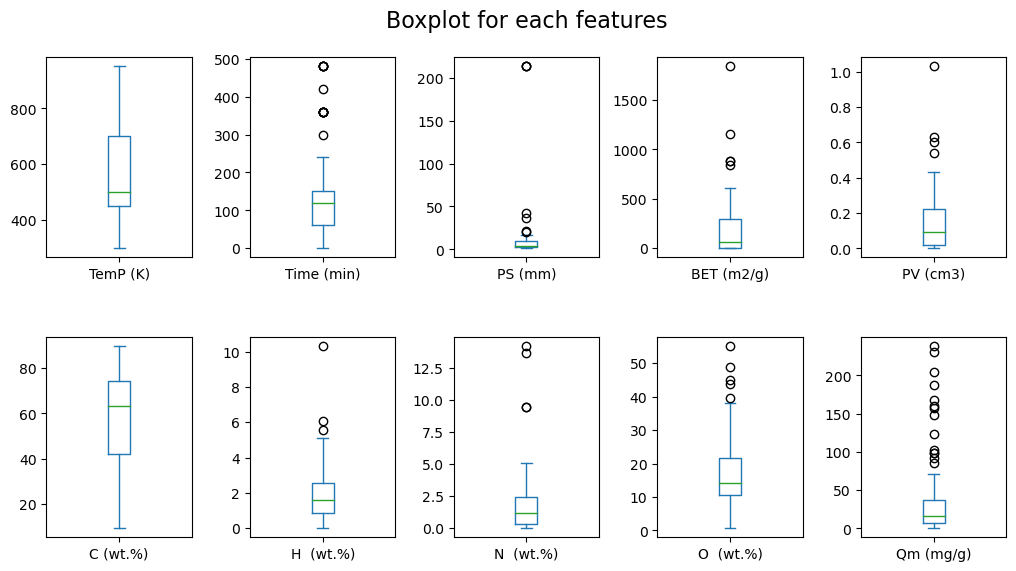

In [11]:
box_df.plot(kind='box',figsize=(12,6),subplots=True,layout=(2,5))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.suptitle('Boxplot for each features', fontsize=16)
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TP          86 non-null     object 
 1   TemP (K)    86 non-null     int64  
 2   Time (min)  86 non-null     float64
 3   PS (mm)     86 non-null     float64
 4   BET (m2/g)  86 non-null     float64
 5   PV (cm3)    86 non-null     float64
 6   C (wt.%)    86 non-null     float64
 7   H  (wt.%)   86 non-null     float64
 8   N  (wt.%)   86 non-null     float64
 9   O  (wt.%)   86 non-null     float64
 10  Qm (mg/g)   86 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 7.5+ KB


In [21]:
# Remove outlier from feature
df = df[df['PS (mm)']< 200]

In [22]:
# Check updated dataset after removing outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 0 to 85
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TP          83 non-null     object 
 1   TemP (K)    83 non-null     int64  
 2   Time (min)  83 non-null     float64
 3   PS (mm)     83 non-null     float64
 4   BET (m2/g)  83 non-null     float64
 5   PV (cm3)    83 non-null     float64
 6   C (wt.%)    83 non-null     float64
 7   H  (wt.%)   83 non-null     float64
 8   N  (wt.%)   83 non-null     float64
 9   O  (wt.%)   83 non-null     float64
 10  Qm (mg/g)   83 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 7.8+ KB


### 4. Heat Map / Correlation Matrix

In this section, a heatmap is produced for the input variables. This locates the important input features.

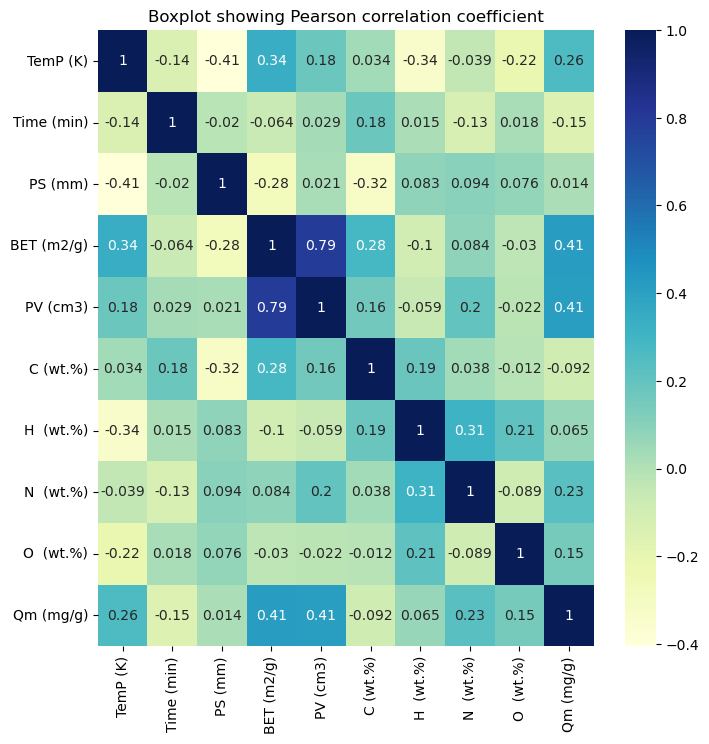

In [23]:
# Subsets columns from dataset turned into a visual heat map
features = df.iloc[:, 1:11]
plt.figure(figsize = (8, 8))
dataplot = sns.heatmap(features.corr(), cmap="YlGnBu", annot=True) 
plt.title('Boxplot showing Pearson correlation coefficient')
plt.show()

There is a high correlation between PV and BET, so we may want to keep only one of them while training the mdoel. Besides, C, H and PS have low correlations with Qm. These observations will be crucial to decide which features to add in the machine learning model. 

### 5. One Hot Encoding

The dataset has one feature with categorical inputs. This column should be transformed into numerical values to fit into the machine learning model. This categorical feature, TP, indicates the type of pharmaceutical waste and by transforming it, we get new features, each indicating one category of the pharmaceutical waste type. 

In [24]:
categorical_columns = ["TP"] # selecting the categorical feature encoding it
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df, one_hot_df], join = 'inner', axis=1)
df = df_encoded.drop(categorical_columns, axis=1)
#df= df.dropna(axis=0)
df.head()

,TemP (K),Time (min),PS (mm),BET (m2/g),PV (cm3),C (wt.%),H (wt.%),N (wt.%),O (wt.%),Qm (mg/g),...,TP_Norfloxacin,TP_Oxytetracycline,TP_Oxytetracycline,TP_Salicylic acid,TP_Sulfadiazine,TP_Sulfamethoxazole,TP_Tetracycline,TP_Triclosan,TP_ibuprofen,TP_sulfamethazine
0,315,150.0,9.82,3.43,0.02,30.84,2.14,0.43,20.32,4.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,600,10.0,1.37,94.39,0.06,30.69,0.96,0.32,20.41,3.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,800,10.0,1.37,120.86,0.08,28.81,0.47,0.33,19.29,8.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,800,150.0,1.41,209.12,0.13,27.05,0.82,0.33,9.73,19.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,800,10.0,3.69,10.82,0.02,35.35,0.72,2.47,2.01,4.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6. Saving the Output File

In [25]:
# Save the updated file
df.to_excel('updated_DATASET.xlsx', index=False)